<a href="https://colab.research.google.com/github/Samplergithub769/mtu-xsens-imu-Sensor/blob/main/mtu_xsens_imu_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**Load Datasets**

In [145]:
df_25hz = pd.read_csv("/content/25hz.csv", skiprows=12)
df_50hz = pd.read_csv("/content/50hz.csv", skiprows=12)
df_100hz = pd.read_csv("/content/100hz.csv", skiprows=12)
df_noise_25hz = pd.read_csv("/content/Noise_25HZ.csv", skiprows=12)
df_noise_50hz = pd.read_csv("/content/Noise_50hz.csv", skiprows=12)
df_noise_100hz = pd.read_csv("/content/Noise_100hz.csv", skiprows=12)


**Display the first few rows and information for each DataFrame**

In [146]:
print("25hz.csv:")
print(df_25hz.head())

print("\n50hz.csv:")
print(df_50hz.head())

print("\n100hz.csv:")
print(df_100hz.head())

print("\nNoise_25HZ.csv:")
print(df_noise_25hz.head())

print("\nNoise_50hz.csv:")
print(df_noise_50hz.head())

print("\nNoise_100hz.csv:")
print(df_noise_100hz.head())

25hz.csv:
   PacketCounter  SampleTimeFine  Acc_X  Acc_Y  Acc_Z   AccHR_X   AccHR_Y  \
0          57364        38214066    0.0    0.0    0.0 -0.004889  0.327786   
1          57366        38214106    0.0    0.0    0.0 -0.043509  0.356337   
2          57368        38214145    0.0    0.0    0.0 -0.029078  0.342039   
3          57369        38214165    0.0    0.0    0.0 -0.000167  0.342172   
4          57371        38214205    0.0    0.0    0.0  0.019263  0.313533   

    AccHR_Z  Mag_X  Mag_Y  Mag_Z  Roll  Pitch  Yaw  Temperature  
0  9.762954    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
1  9.739222    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
2  9.739135    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
3  9.762895    0.0    0.0    0.0   0.0    0.0  0.0          0.0  
4  9.781975    0.0    0.0    0.0   0.0    0.0  0.0          0.0  

50hz.csv:
   PacketCounter  SampleTimeFine     Acc_X     Acc_Y     Acc_Z   AccHR_X  \
0          36606         7038992 -0.101958  

In [147]:
print("Info for df_25hz:")
df_25hz.info()
print("\nMissing values in df_25hz:")
print(df_25hz.isnull().sum())

print("\nInfo for df_50hz:")
df_50hz.info()
print("\nMissing values in df_50hz:")
print(df_50hz.isnull().sum())

print("\nInfo for df_100hz:")
df_100hz.info()
print("\nMissing values in df_100hz:")
print(df_100hz.isnull().sum())

print("\nInfo for df_noise_25hz:")
df_noise_25hz.info()
print("\nMissing values in df_noise_25hz:")
print(df_noise_25hz.isnull().sum())

print("\nInfo for df_noise_50hz:")
df_noise_50hz.info()
print("\nMissing values in df_noise_50hz:")
print(df_noise_50hz.isnull().sum())

print("\nInfo for df_noise_100hz:")
df_noise_100hz.info()
print("\nMissing values in df_noise_100hz:")
print(df_noise_100hz.isnull().sum())

Info for df_25hz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530000 entries, 0 to 529999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PacketCounter   530000 non-null  int64  
 1   SampleTimeFine  530000 non-null  int64  
 2   Acc_X           530000 non-null  float64
 3   Acc_Y           530000 non-null  float64
 4   Acc_Z           530000 non-null  float64
 5   AccHR_X         530000 non-null  float64
 6   AccHR_Y         530000 non-null  float64
 7   AccHR_Z         530000 non-null  float64
 8   Mag_X           530000 non-null  float64
 9   Mag_Y           530000 non-null  float64
 10  Mag_Z           530000 non-null  float64
 11  Roll            530000 non-null  float64
 12  Pitch           530000 non-null  float64
 13  Yaw             530000 non-null  float64
 14  Temperature     530000 non-null  float64
dtypes: float64(13), int64(2)
memory usage: 60.7 MB

Missing values in df_25hz:
PacketCou

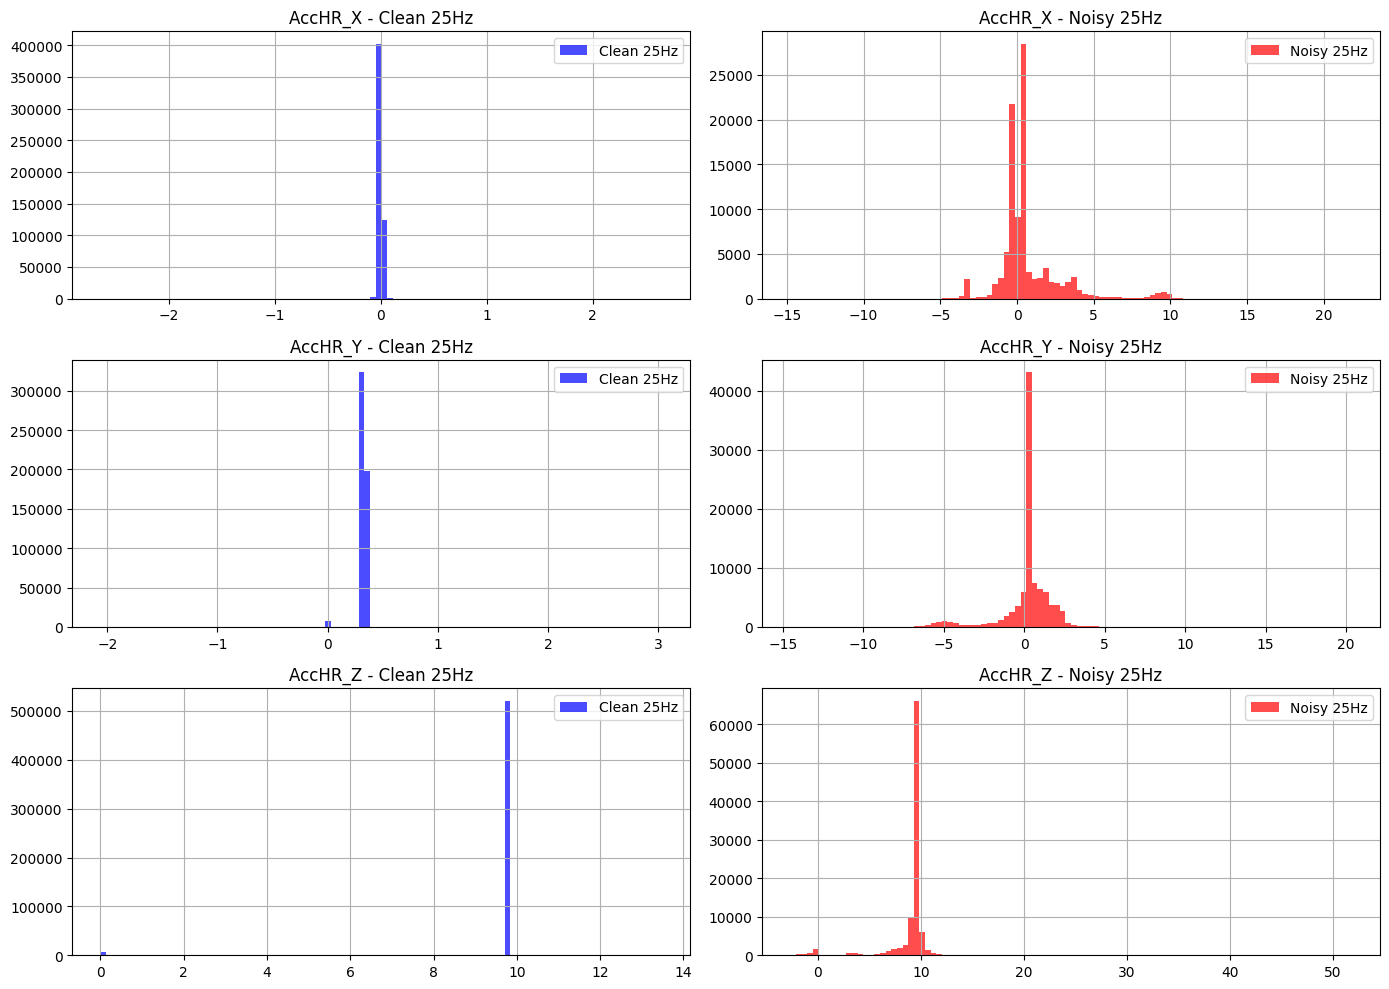

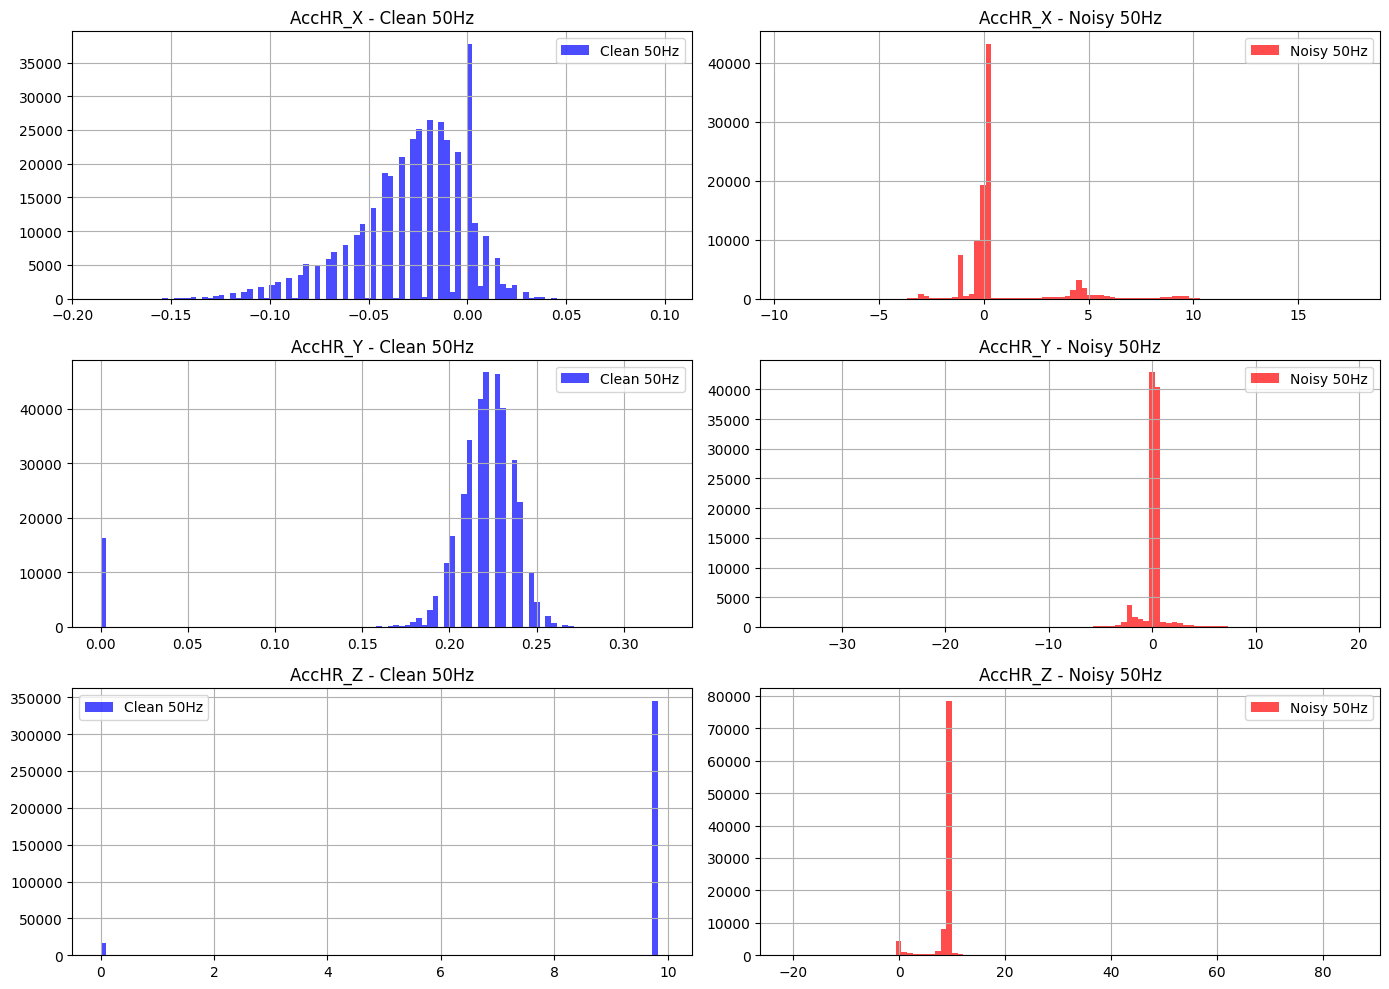

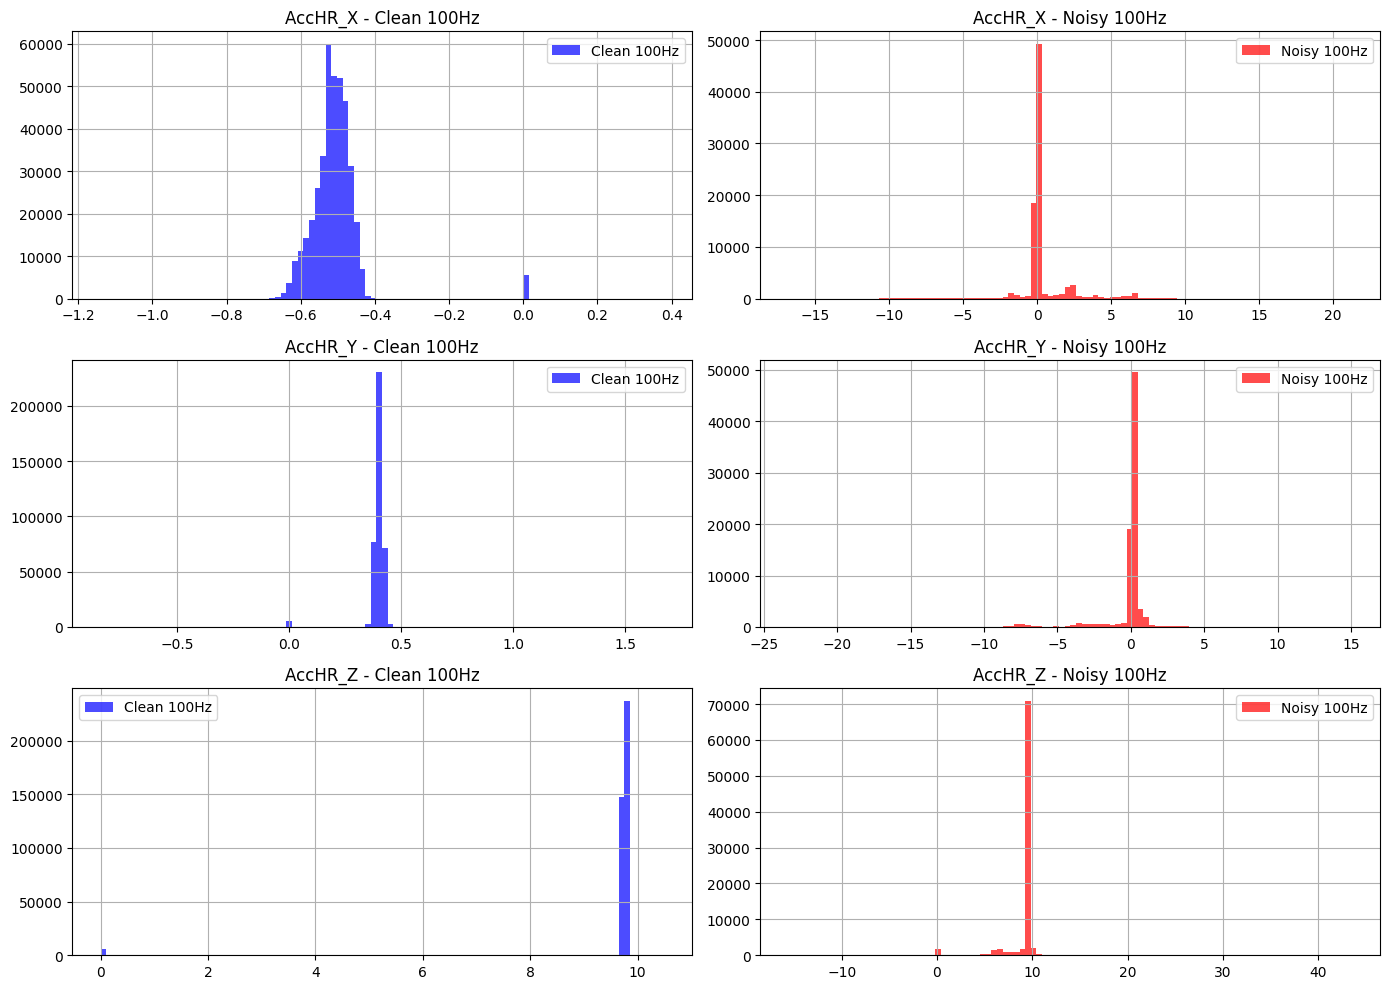

In [148]:
#Define the columns for analysis
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Function to plot histograms side by side
def plot_histograms(clean_df, noisy_df, label):
    plt.figure(figsize=(14, 10))
    for i, col in enumerate(acc_cols):
        plt.subplot(3, 2, 2*i + 1)
        plt.hist(clean_df[col], bins=100, alpha=0.7, color='blue', label=f'Clean {label}')
        plt.title(f'{col} - Clean {label}')
        plt.grid(True)
        plt.legend()

        plt.subplot(3, 2, 2*i + 2)
        plt.hist(noisy_df[col], bins=100, alpha=0.7, color='red', label=f'Noisy {label}')
        plt.title(f'{col} - Noisy {label}')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

# Use the function for each frequency
plot_histograms(df_25hz, df_noise_25hz, "25Hz")
plot_histograms(df_50hz, df_noise_50hz, "50Hz")
plot_histograms(df_100hz, df_noise_100hz, "100Hz")




**Box Plots**

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


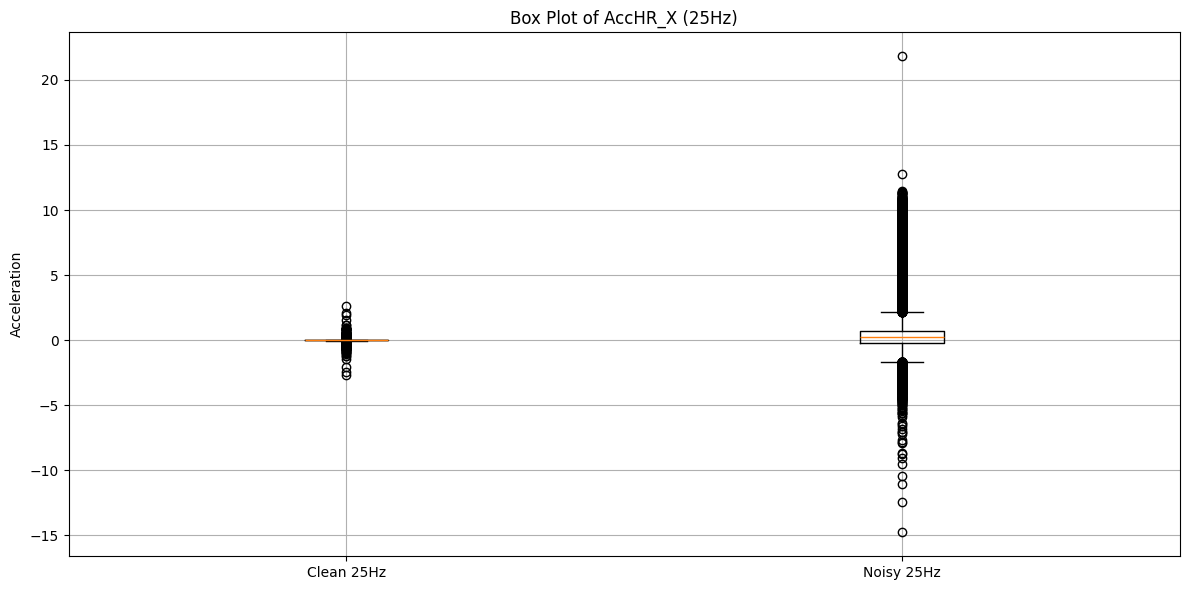

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


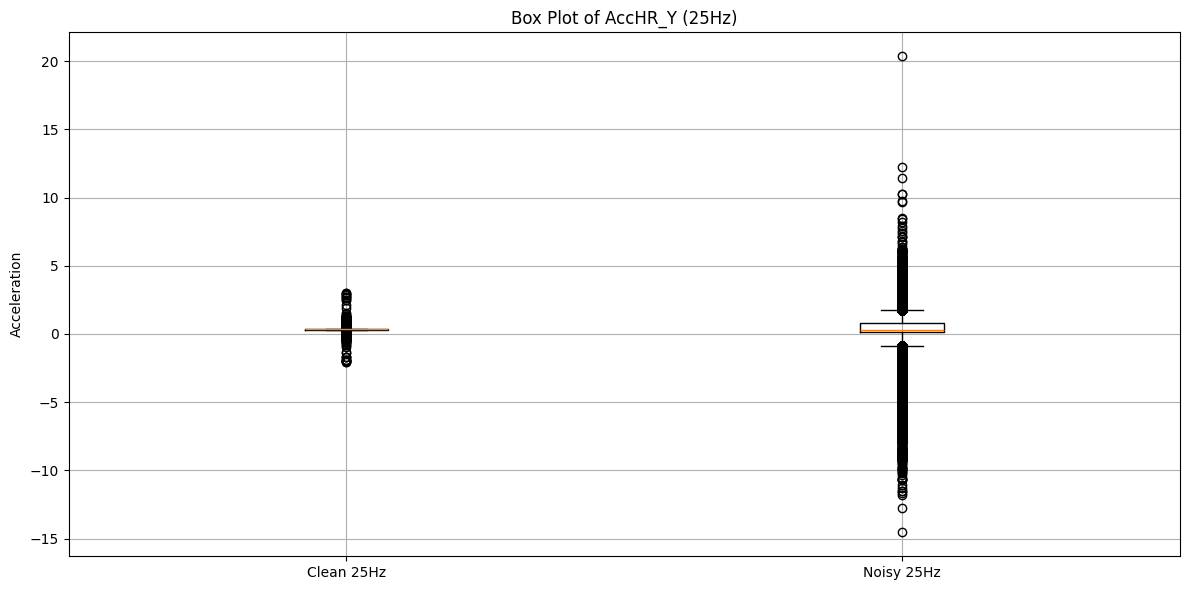

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


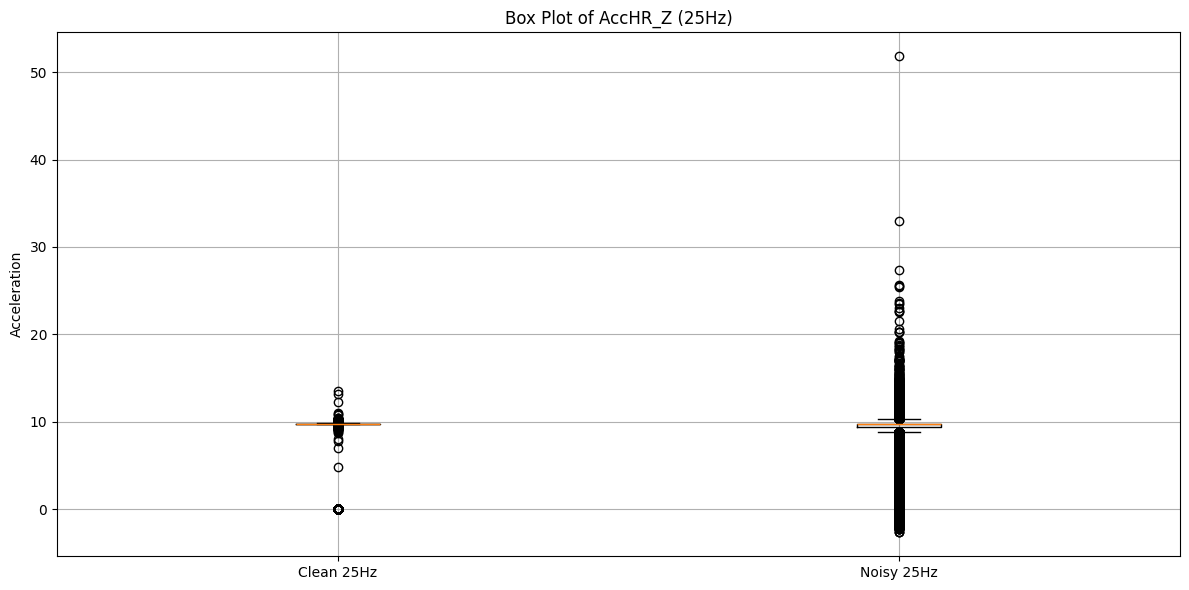

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


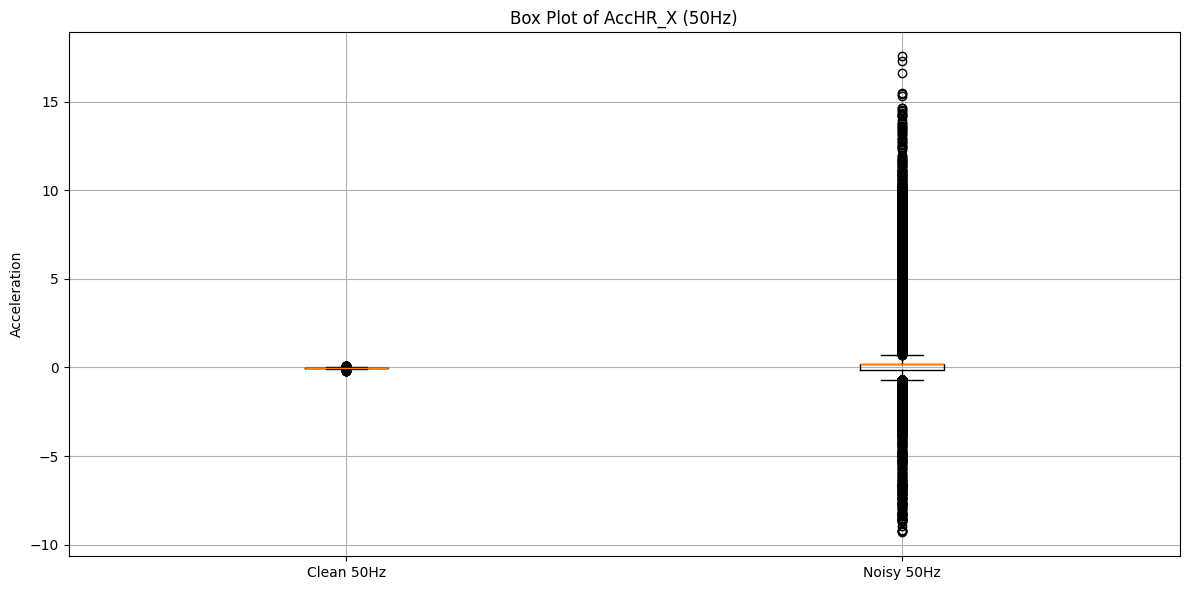

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


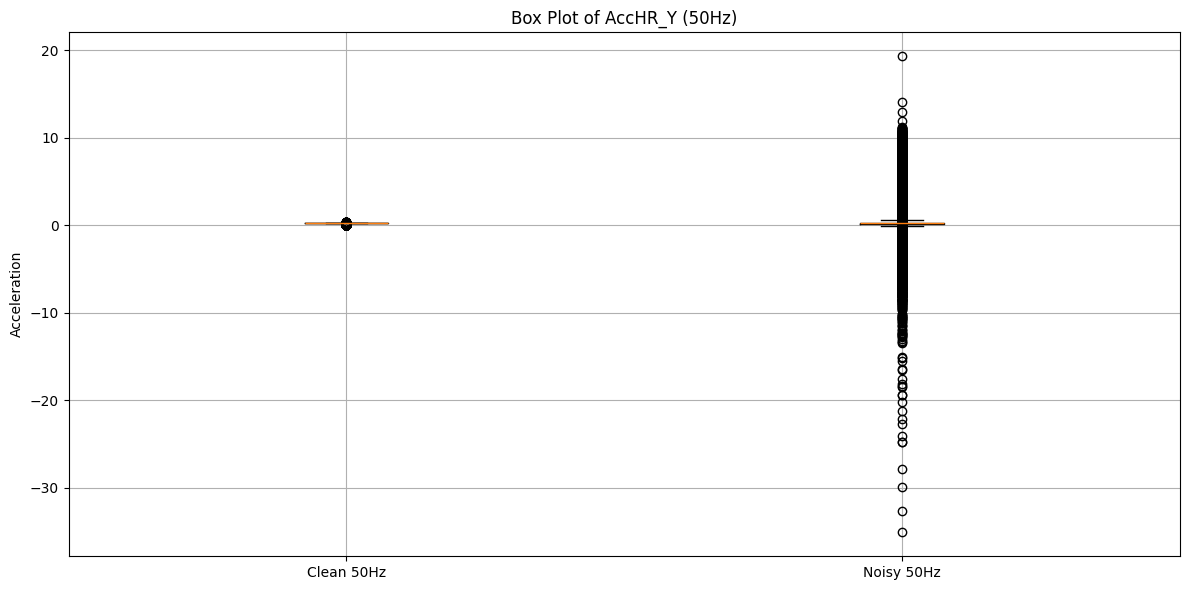

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


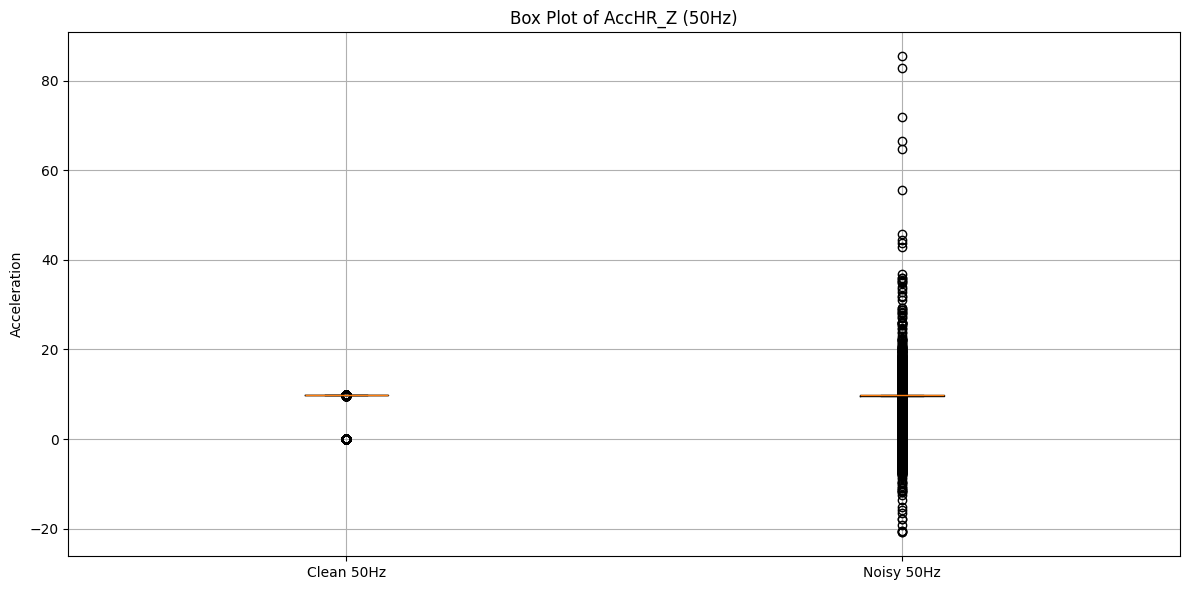

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


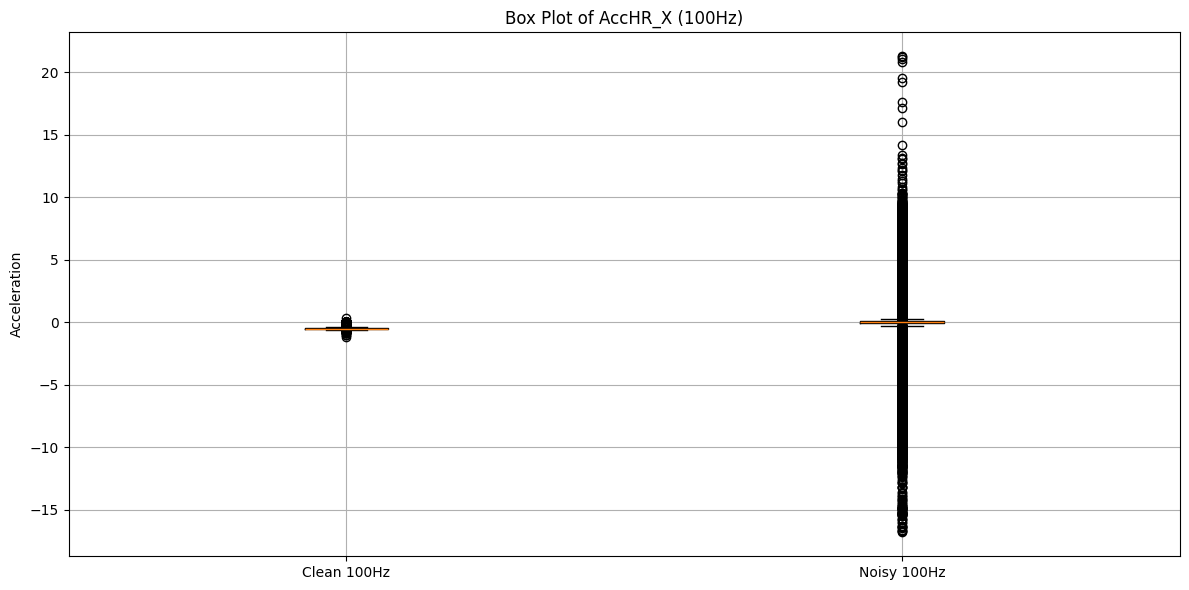

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


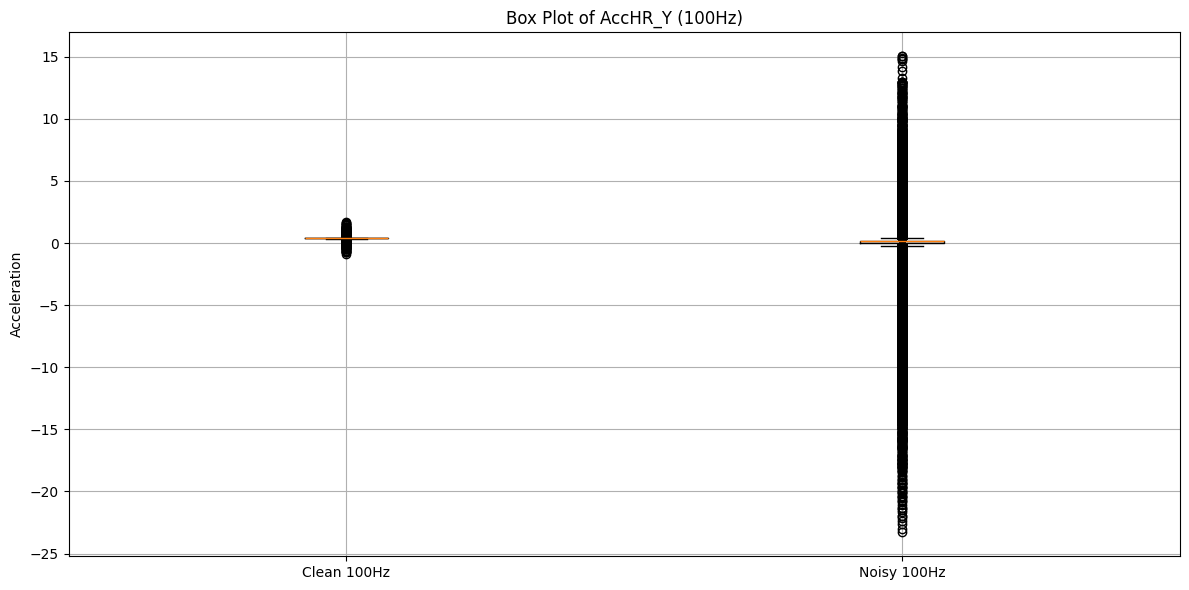

<ipython-input-149-2047697503>:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


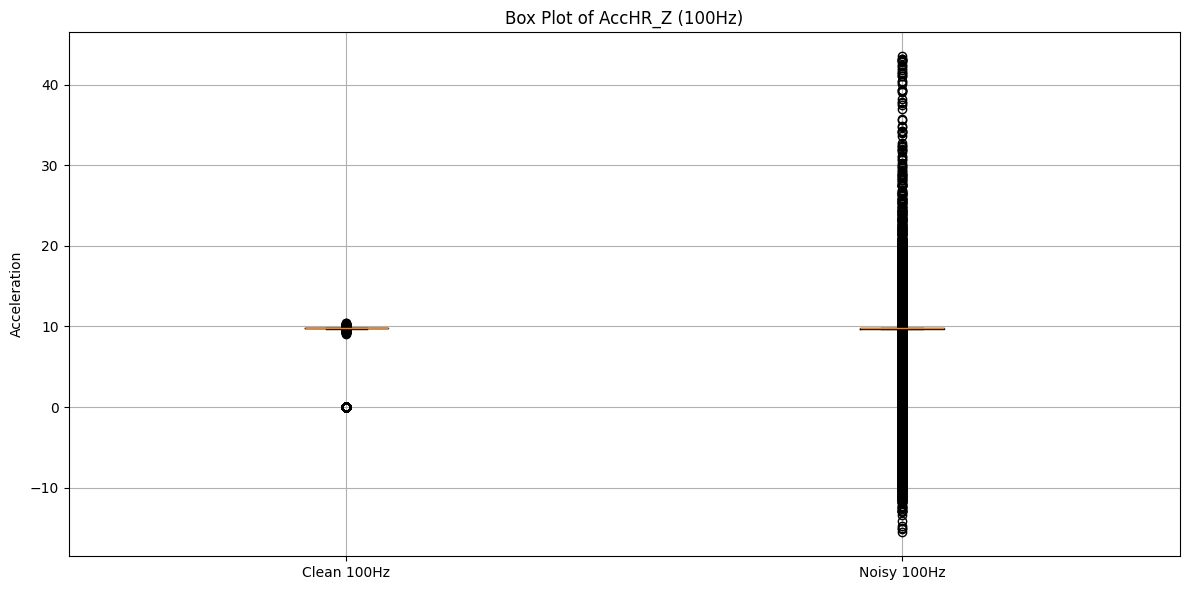

In [149]:
# Prepare data for box plots
data = {
    '25Hz': {
        'Clean': df_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']],
        'Noisy': df_noise_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']]
    },
    '50Hz': {
        'Clean': df_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']],
        'Noisy': df_noise_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']]
    },
    '100Hz': {
        'Clean': df_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']],
        'Noisy': df_noise_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']]
    }
}

axes = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Plot boxplots using loop
for freq, sets in data.items():
    for axis in axes:
        plt.figure(figsize=(12, 6))
        plt.boxplot([
            sets['Clean'][axis].dropna(),
            sets['Noisy'][axis].dropna()
        ], labels=[f'Clean {freq}', f'Noisy {freq}'])
        plt.title(f'Box Plot of {axis} ({freq})')
        plt.ylabel('Acceleration')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


**Create plots for Temperature vs SampleTimeFine for each dataset**

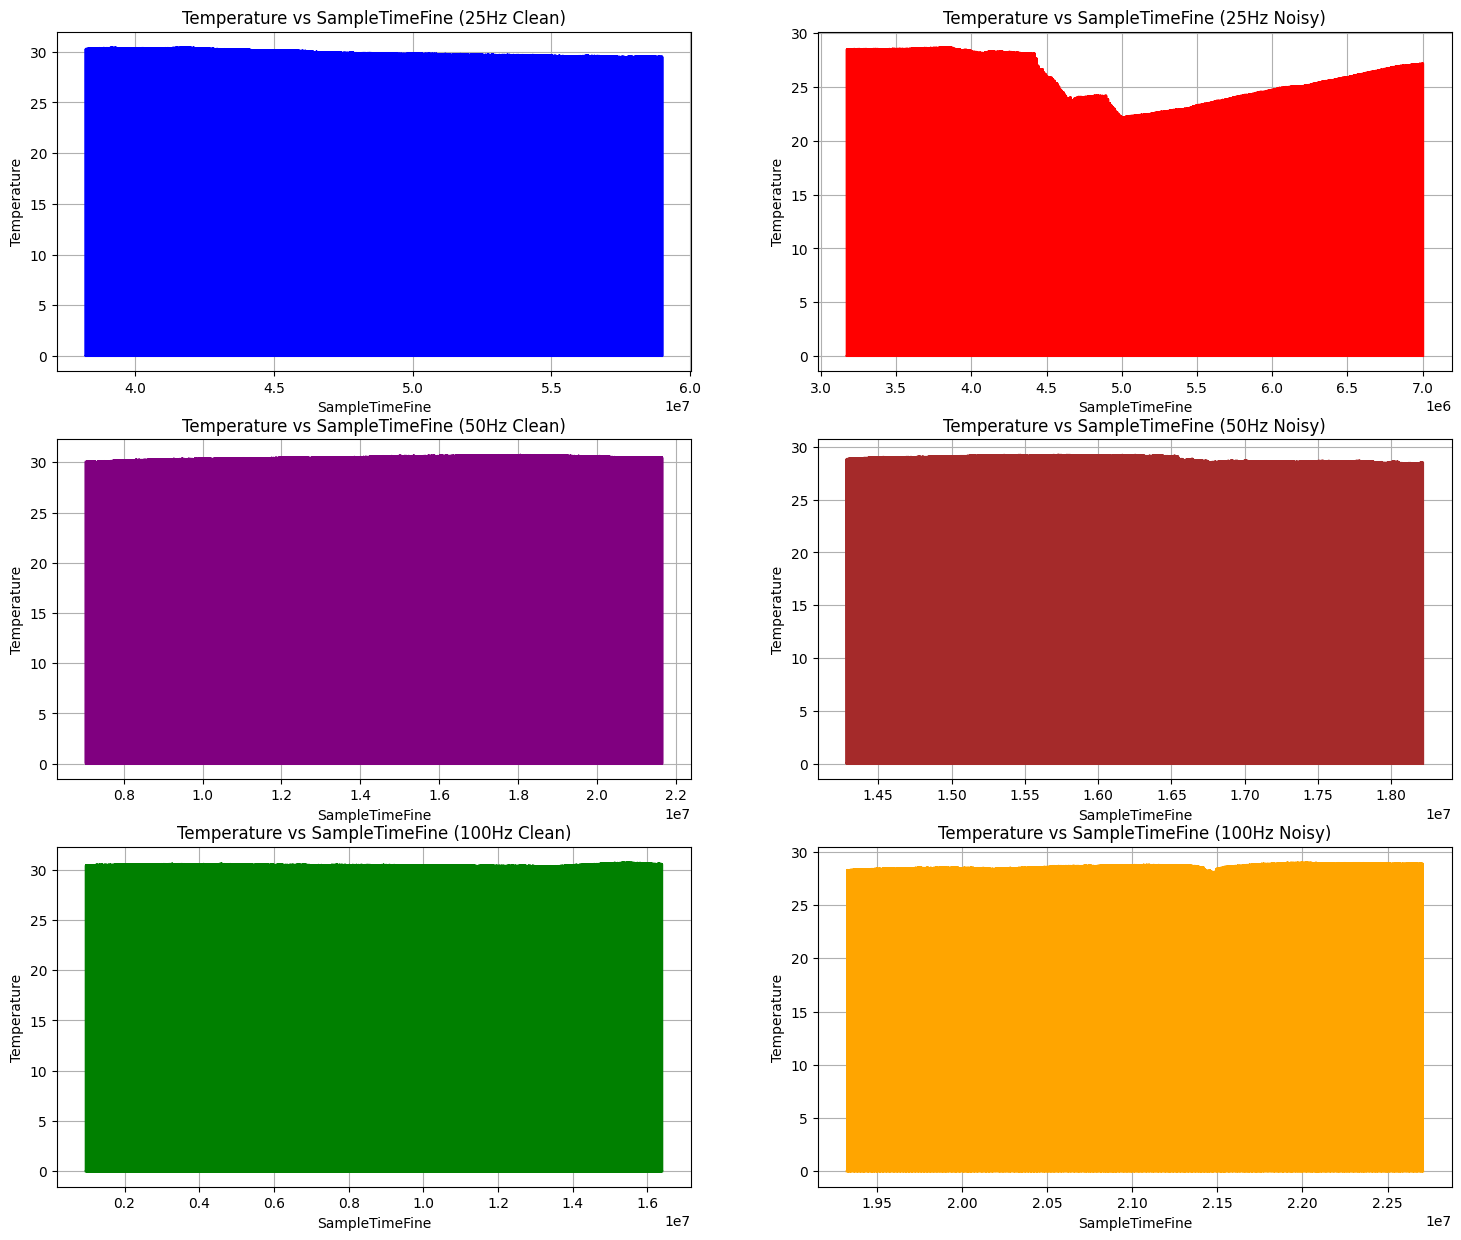

In [150]:
plt.figure(figsize=(18, 15))

# Plot for 25hz.csv
plt.subplot(3, 2, 1)
plt.plot(df_25hz['SampleTimeFine'], df_25hz['Temperature'], color='blue')
plt.title('Temperature vs SampleTimeFine (25Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_25HZ.csv
plt.subplot(3, 2, 2)
plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz['Temperature'], color='red')
plt.title('Temperature vs SampleTimeFine (25Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for 50hz.csv
plt.subplot(3, 2, 3)
plt.plot(df_50hz['SampleTimeFine'], df_50hz['Temperature'], color='purple')
plt.title('Temperature vs SampleTimeFine (50Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_50hz.csv
plt.subplot(3, 2, 4)
plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz['Temperature'], color='brown')
plt.title('Temperature vs SampleTimeFine (50Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)


# Plot for 100hz.csv
plt.subplot(3, 2, 5)
plt.plot(df_100hz['SampleTimeFine'], df_100hz['Temperature'], color='green')
plt.title('Temperature vs SampleTimeFine (100Hz Clean)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

# Plot for Noise_100hz.csv
plt.subplot(3, 2, 6)
plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz['Temperature'], color='orange')
plt.title('Temperature vs SampleTimeFine (100Hz Noisy)')
plt.xlabel('SampleTimeFine')
plt.ylabel('Temperature')
plt.grid(True)

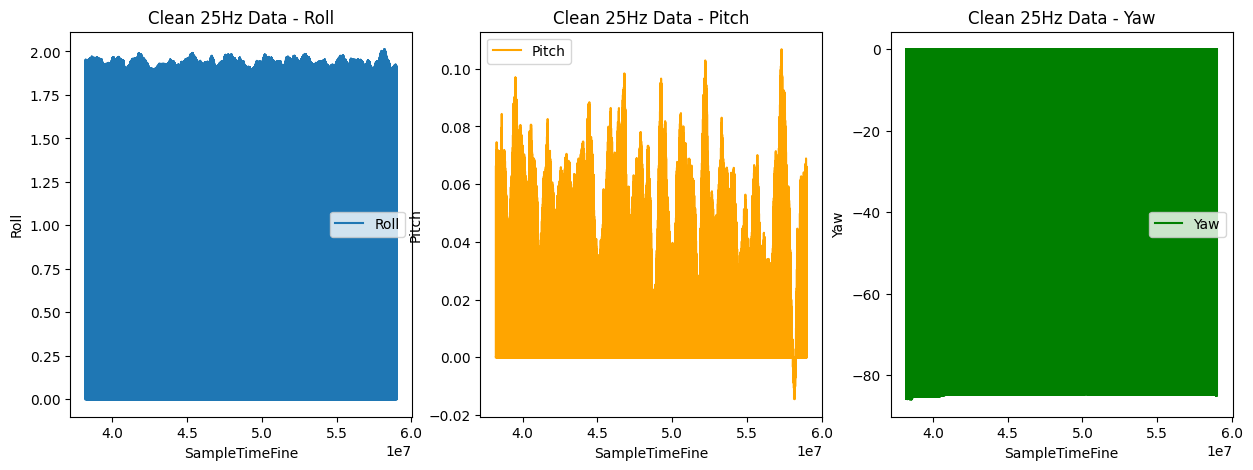

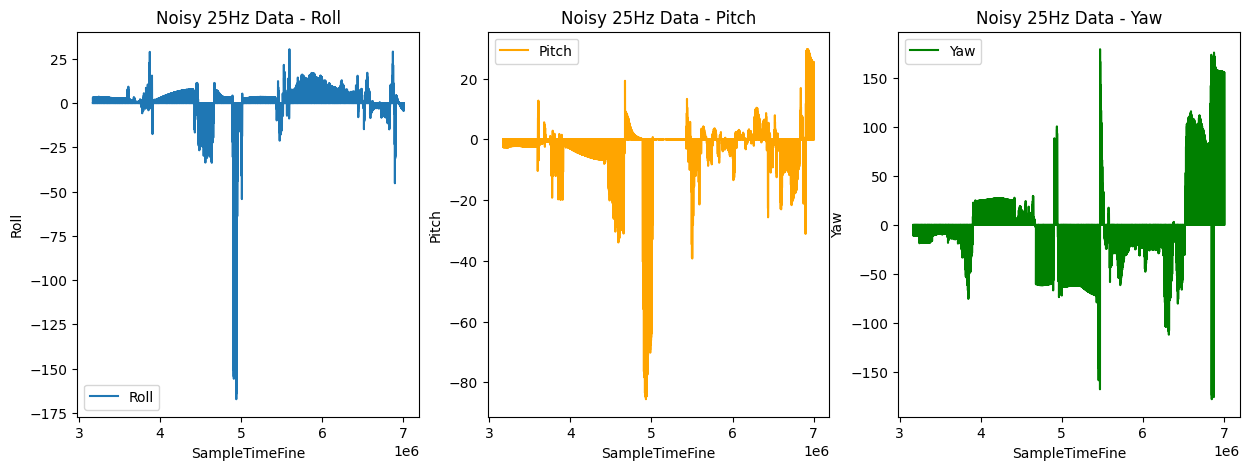

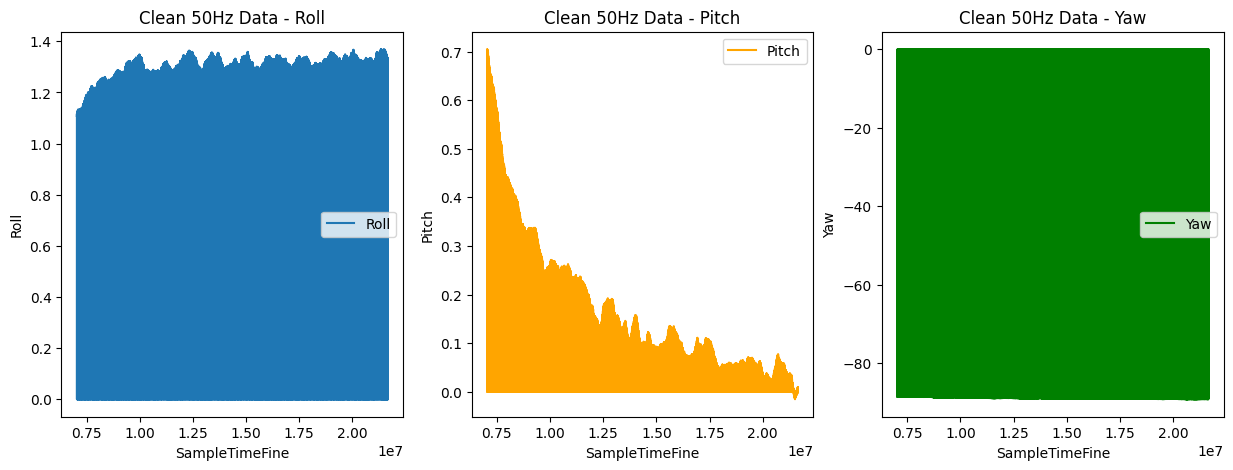

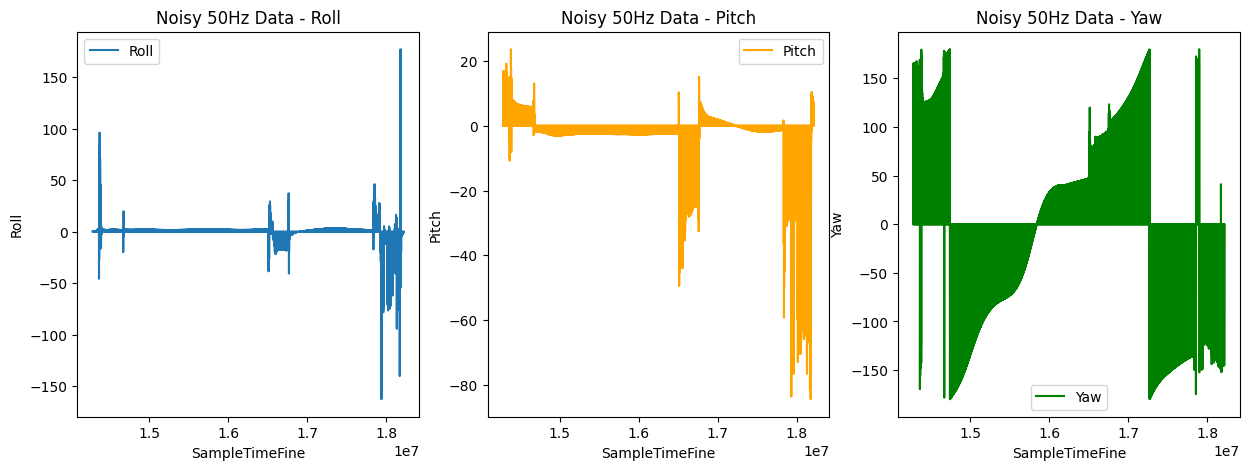

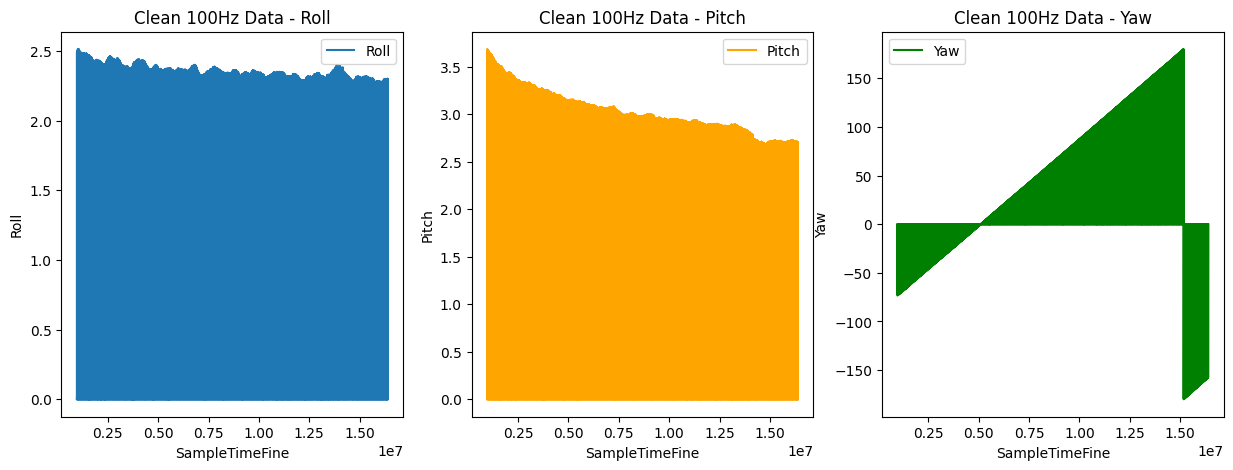

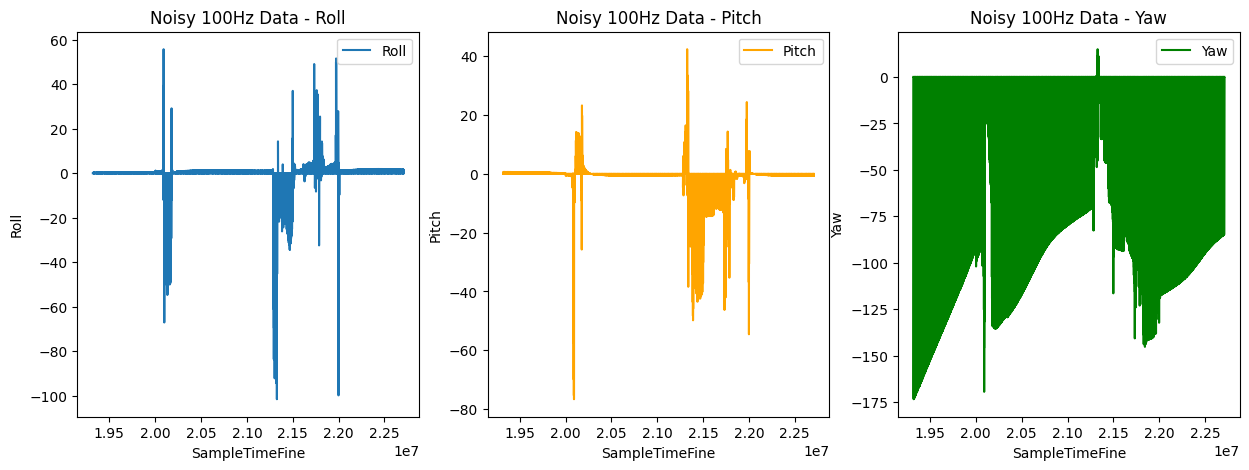

In [151]:
# Create a function to plot Roll, Pitch, Yaw data
def plot_rpy(df, title_prefix, filename_prefix):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(df['SampleTimeFine'], df['Roll'], label='Roll')
    plt.title(f'{title_prefix} - Roll')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Roll')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(df['SampleTimeFine'], df['Pitch'], label='Pitch', color='orange')
    plt.title(f'{title_prefix} - Pitch')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Pitch')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(df['SampleTimeFine'], df['Yaw'], label='Yaw', color='green')
    plt.title(f'{title_prefix} - Yaw')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Yaw')
    plt.legend()

# Plotting clean datasets
plot_rpy(df_25hz, 'Clean 25Hz Data', 'clean_25hz')
plot_rpy(df_noise_25hz, 'Noisy 25Hz Data', 'noisy_25hz')
plot_rpy(df_50hz, 'Clean 50Hz Data', 'clean_50hz')
plot_rpy(df_noise_50hz, 'Noisy 50Hz Data', 'noisy_50hz')
plot_rpy(df_100hz, 'Clean 100Hz Data', 'clean_100hz')
plot_rpy(df_noise_100hz, 'Noisy 100Hz Data', 'noisy_100hz')


**Calculate and print summary statistics for 'AccHR_X', 'AccHR_Y', 'AccHR_Z'**

In [152]:
print("Summary Statistics for 25Hz Clean Data:")
print(df_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 25Hz Noisy Data:")
print(df_noise_25hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 50Hz Clean Data:")
print(df_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 50Hz Noisy Data:")
print(df_noise_50hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 100Hz Clean Data:")
print(df_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

print("\nSummary Statistics for 100Hz Noisy Data:")
print(df_noise_100hz[['AccHR_X', 'AccHR_Y', 'AccHR_Z']].describe())

Summary Statistics for 25Hz Clean Data:
             AccHR_X        AccHR_Y        AccHR_Z
count  530000.000000  530000.000000  530000.000000
mean       -0.008408       0.326508       9.626153
std         0.020991       0.046046       1.166218
min        -2.649340      -2.061765       0.000000
25%        -0.019102       0.322987       9.757645
50%        -0.009313       0.332495       9.767488
75%         0.000315       0.337977       9.777254
max         2.656289       3.034816      13.491242

Summary Statistics for 25Hz Noisy Data:
            AccHR_X       AccHR_Y       AccHR_Z
count  97672.000000  97672.000000  97672.000000
mean       0.712076      0.170159      9.117952
std        2.080176      1.597833      2.029336
min      -14.780096    -14.544634     -2.665523
25%       -0.230897      0.134625      9.384631
50%        0.259690      0.294164      9.714080
75%        0.740436      0.793527      9.769021
max       21.826252     20.360428     51.830212

Summary Statistics for 50Hz

**Data Cleaning**

**Moving Average Filter**

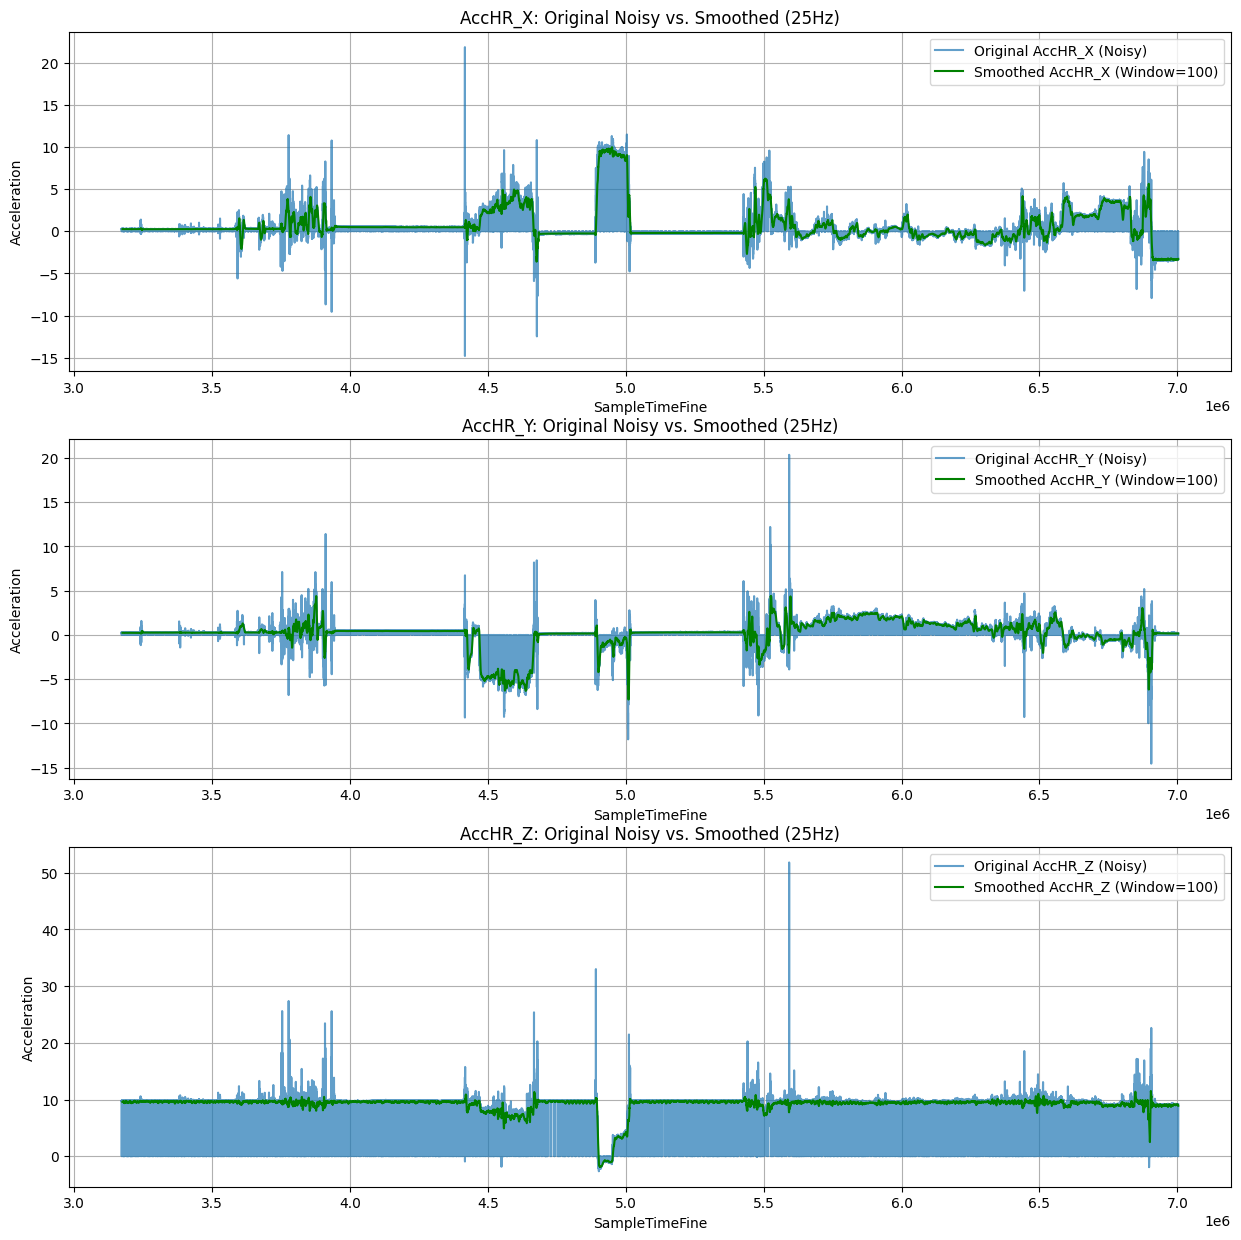

In [153]:
# Define the columns for smoothing
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']
# Moving Average Filter for 25Hz noisy data
window_size_25hz = 100
df_noise_25hz_cleaned = df_noise_25hz.copy()
for col in acc_cols:
    df_noise_25hz_cleaned[f'{col}_smoothed'] = df_noise_25hz[col].rolling(window=window_size_25hz).mean()

# Plot original vs smoothed for 25Hz noisy data
plt.figure(figsize=(15, 15))
for i, col in enumerate(acc_cols):
    plt.subplot(3, 1, i + 1)
    plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz[col], label=f'Original {col} (Noisy)', alpha=0.7)
    plt.plot(df_noise_25hz['SampleTimeFine'], df_noise_25hz_cleaned[f'{col}_smoothed'], label=f'Smoothed {col} (Window={window_size_25hz})', color='green')
    plt.title(f'{col}: Original Noisy vs. Smoothed (25Hz)')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)


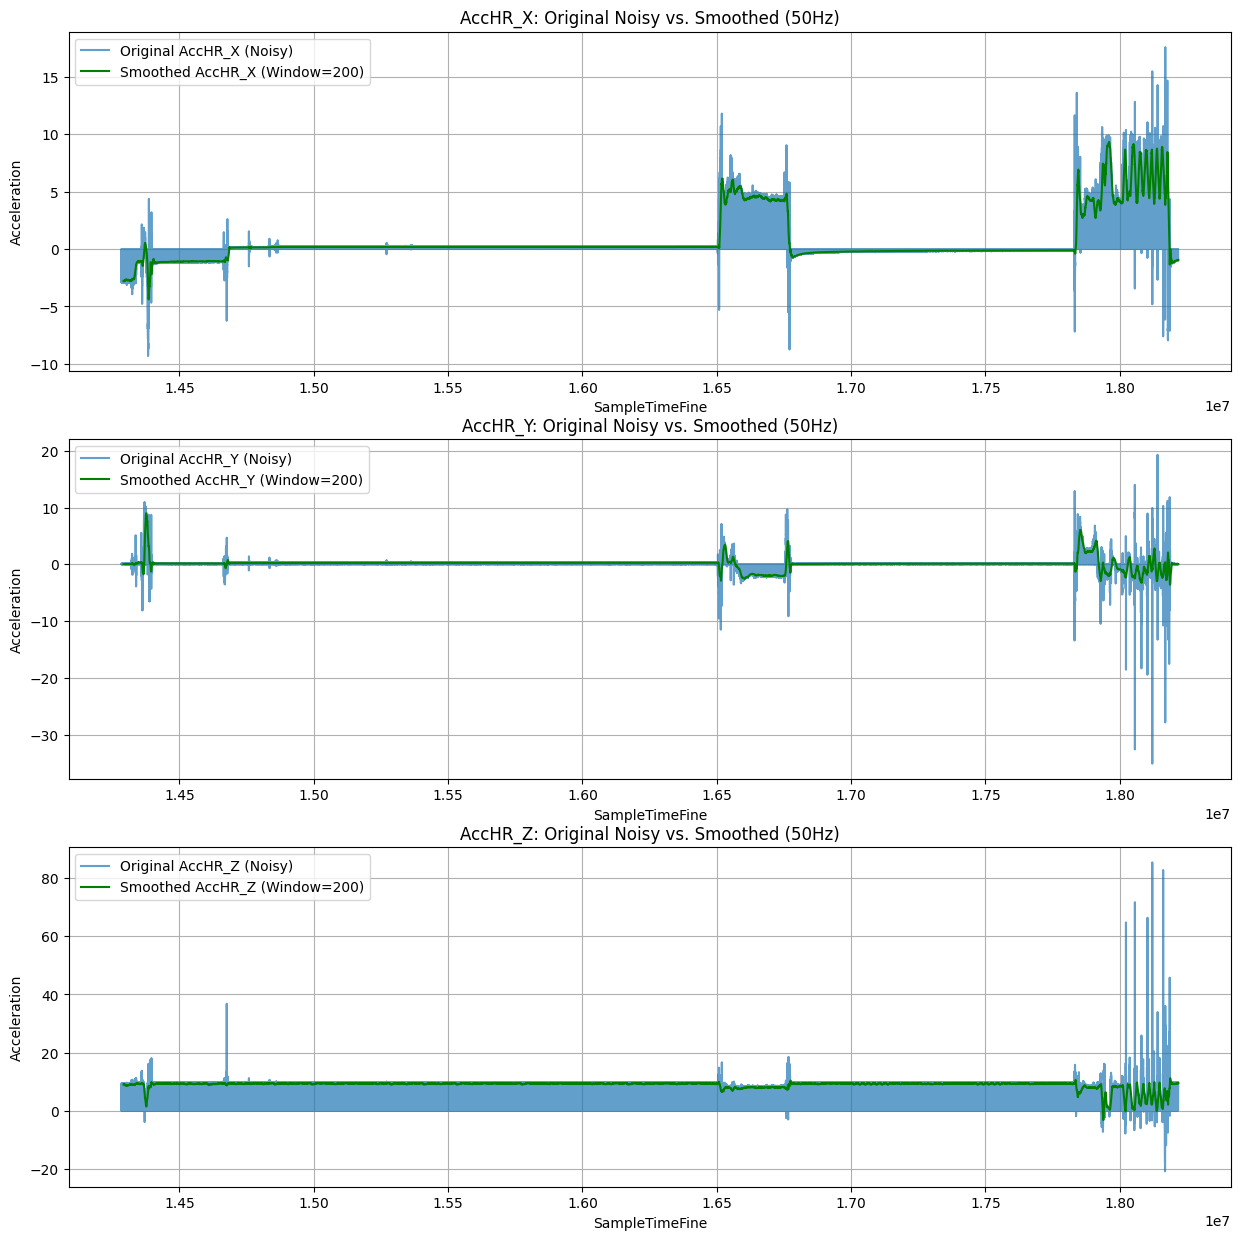

In [154]:
# Moving Average Filter for 50Hz noisy data
window_size_50hz = 200
df_noise_50hz_cleaned = df_noise_50hz.copy()
for col in acc_cols:
    df_noise_50hz_cleaned[f'{col}_smoothed'] = df_noise_50hz[col].rolling(window=window_size_50hz).mean()

# Plot original vs smoothed for 50Hz noisy data
plt.figure(figsize=(15, 15))
for i, col in enumerate(acc_cols):
    plt.subplot(3, 1, i + 1)
    plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz[col], label=f'Original {col} (Noisy)', alpha=0.7)
    plt.plot(df_noise_50hz['SampleTimeFine'], df_noise_50hz_cleaned[f'{col}_smoothed'], label=f'Smoothed {col} (Window={window_size_50hz})', color='green')
    plt.title(f'{col}: Original Noisy vs. Smoothed (50Hz)')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)

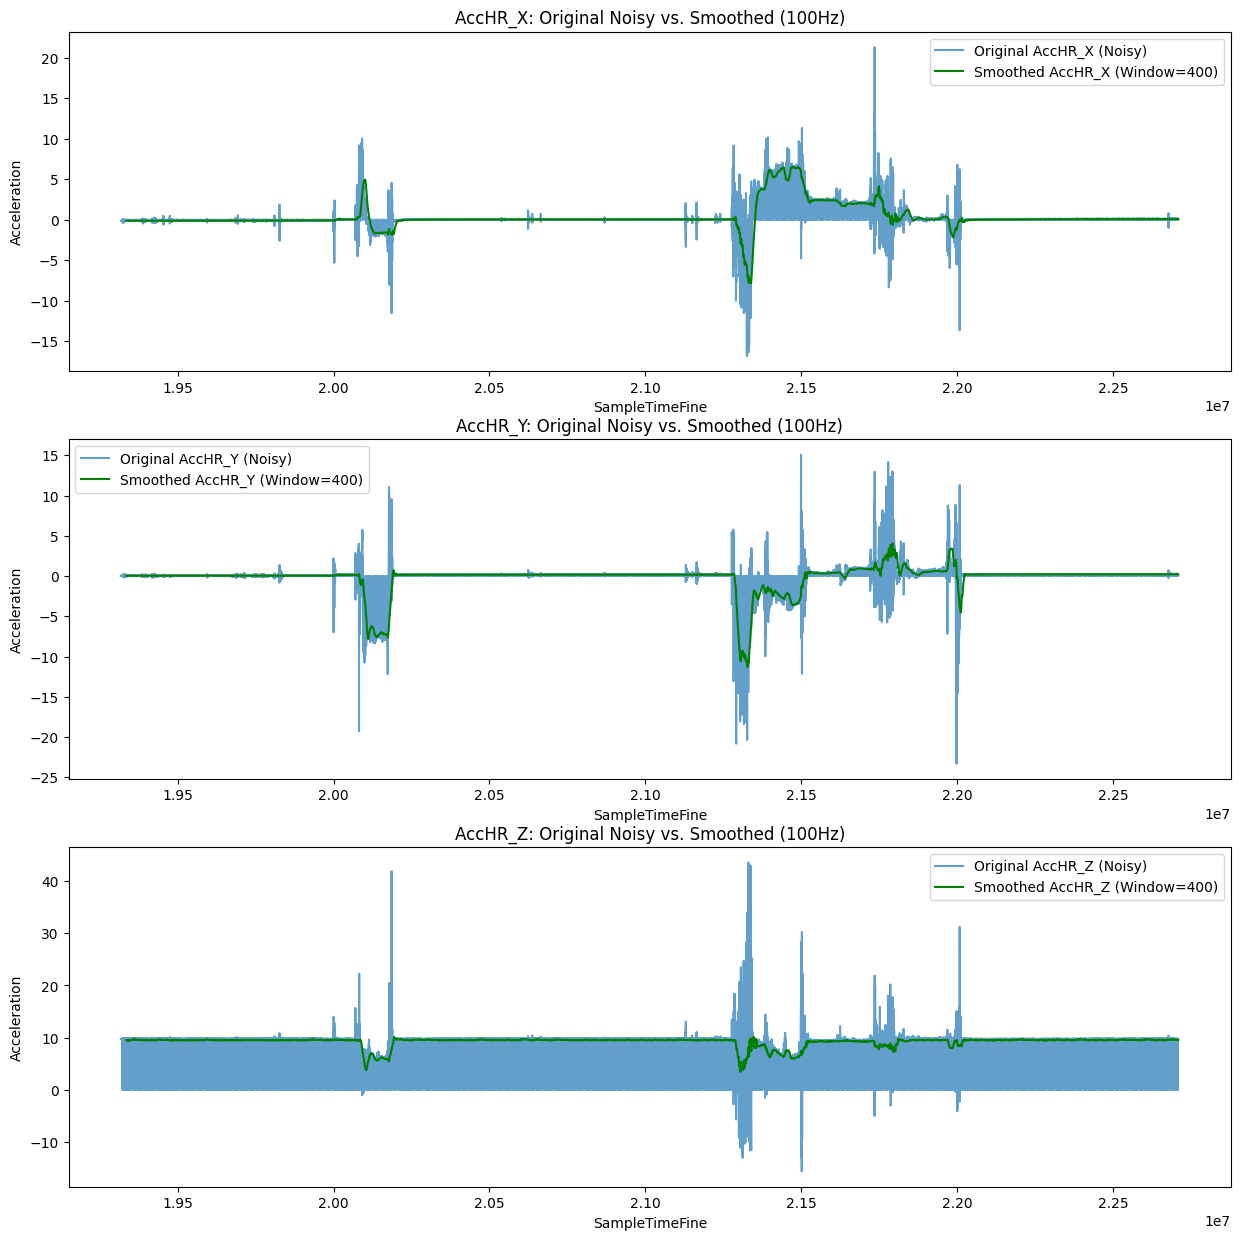

In [155]:
# Moving Average Filter for 100Hz noisy data
window_size_100hz = 400  # A larger window might be suitable for 100Hz to observe smoothing effect, adjusting for frequency
df_noise_100hz_cleaned = df_noise_100hz.copy()
for col in acc_cols:
    df_noise_100hz_cleaned[f'{col}_smoothed'] = df_noise_100hz[col].rolling(window=window_size_100hz).mean()

# Plot original vs smoothed for 100Hz noisy data
plt.figure(figsize=(15, 15))
for i, col in enumerate(acc_cols):
    plt.subplot(3, 1, i + 1)
    plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz[col], label=f'Original {col} (Noisy)', alpha=0.7)
    plt.plot(df_noise_100hz['SampleTimeFine'], df_noise_100hz_cleaned[f'{col}_smoothed'], label=f'Smoothed {col} (Window={window_size_100hz})', color='green')
    plt.title(f'{col}: Original Noisy vs. Smoothed (100Hz)')
    plt.xlabel('SampleTimeFine')
    plt.ylabel('Acceleration')
    plt.legend()

In [156]:
df_noise_25hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,AccHR_X_smoothed,AccHR_Y_smoothed,AccHR_Z_smoothed
0,29451,3171089,0.0,0.0,0.0,0.249836,0.258465,9.740667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,29453,3171129,0.0,0.0,0.0,0.269149,0.239405,9.750143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,29455,3171169,0.0,0.0,0.0,0.254872,0.244124,9.764629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,29457,3171208,0.0,0.0,0.0,0.264353,0.248957,9.754959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,29460,3171248,0.0,0.0,0.0,0.254652,0.244124,9.735859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97667,35503,7002926,0.0,0.0,0.0,-3.368168,0.137371,9.191718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.267582,0.163119,8.886289
97668,35505,7002966,0.0,0.0,0.0,-3.339472,0.127932,9.181927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.267343,0.162880,8.886048
97669,35507,7003006,0.0,0.0,0.0,-3.349003,0.118314,9.182014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.267009,0.162786,8.885806
97670,35509,7003045,0.0,0.0,0.0,-3.363483,0.151754,9.186865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.267392,0.162736,8.885856


In [157]:
df_noise_50hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,AccHR_X_smoothed,AccHR_Y_smoothed,AccHR_Z_smoothed
0,7093,14284182,0.000000,0.000000,0.000000,-2.869573,0.052268,9.342918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN
1,7095,14284222,0.000000,0.000000,0.000000,-2.859960,0.052313,9.347641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN
2,7097,14284261,0.000000,0.000000,0.000000,-2.855019,0.042760,9.362004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN
3,7101,14284332,-2.861004,0.047889,9.350098,0.000000,0.000000,0.000000,0.315287,-0.661978,-0.510735,0.794072,16.812263,165.393556,28.85,NaN,NaN,NaN
4,7104,14284381,0.000000,0.000000,0.000000,-2.874600,0.080970,9.328524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97729,28315,18217244,0.000000,0.000000,0.000000,-0.917821,0.047197,9.701907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,-0.951097,0.053569,9.465232
97730,28319,18217324,0.000000,0.000000,0.000000,-0.917974,0.056772,9.687507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,-0.950523,0.053548,9.465155
97731,28322,18217363,0.000000,0.000000,0.000000,-0.922586,0.066324,9.716299,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,-0.949996,0.053526,9.465271
97732,28324,18217403,0.000000,0.000000,0.000000,-0.917726,0.066346,9.725853,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,-0.949516,0.053552,9.465388


In [158]:
df_noise_100hz_cleaned

,PacketCounter,SampleTimeFine,Acc_X,Acc_Y,Acc_Z,AccHR_X,AccHR_Y,AccHR_Z,Mag_X,Mag_Y,Mag_Z,Roll,Pitch,Yaw,Temperature,AccHR_X_smoothed,AccHR_Y_smoothed,AccHR_Z_smoothed
0,16892,19319519,0.0,0.0,0.0,-0.131993,0.031852,9.753344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,16897,19319559,0.0,0.0,0.0,-0.117286,0.012770,9.786829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,16900,19319589,0.0,0.0,0.0,-0.112835,0.046302,9.762765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,16905,19319638,0.0,0.0,0.0,-0.098794,0.036795,9.714721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,16909,19319668,0.0,0.0,0.0,-0.127397,0.041449,9.734112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85208,64667,22709038,0.0,0.0,0.0,0.091821,0.209589,9.732641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084135,0.208990,9.528689
85209,64672,22709078,0.0,0.0,0.0,0.082333,0.214332,9.747093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084087,0.209002,9.528690
85210,64676,22709118,0.0,0.0,0.0,0.115760,0.233636,9.746809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084158,0.209038,9.528629
85211,64681,22709157,0.0,0.0,0.0,0.096630,0.228760,9.746962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084158,0.209050,9.528557


In [159]:
# List of cleaned DataFrames
datasets = {
    "25Hz": df_noise_25hz_cleaned,
    "50Hz": df_noise_50hz_cleaned,
    "100Hz": df_noise_100hz_cleaned
}

# Acceleration columns to analyze
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Loop through each dataset and print summary stats
for label, df in datasets.items():
    smoothed_cols = [f'{col}_smoothed' for col in acc_cols]
    smoothed_stats = df[smoothed_cols].describe()

    print(f"\nSummary Statistics for Smoothed Data ({label}):")
    print(smoothed_stats)


Summary Statistics for Smoothed Data (25Hz):
       AccHR_X_smoothed  AccHR_Y_smoothed  AccHR_Z_smoothed
count      97573.000000      97573.000000      97573.000000
mean           0.714311          0.170128          9.117849
std            1.994308          1.506851          1.545063
min           -3.597575         -7.301746         -1.889708
25%           -0.206239          0.158083          9.306309
50%            0.260000          0.289519          9.524724
75%            0.762516          0.770660          9.648438
max            9.937273          4.393195         11.502519

Summary Statistics for Smoothed Data (50Hz):
       AccHR_X_smoothed  AccHR_Y_smoothed  AccHR_Z_smoothed
count      97535.000000      97535.000000      97535.000000
mean           0.681030          0.115528          8.881147
std            2.044659          0.913190          1.385371
min           -4.391196         -3.554404         -3.256548
25%           -0.148101          0.118917          9.175866
50%     

In [160]:
# Accelerometer columns
acc_cols = ['AccHR_X', 'AccHR_Y', 'AccHR_Z']

# Dictionary with noisy DataFrames (key: '25Hz', '50Hz', '100Hz', value: corresponding DataFrame)
noisy_dataframes = {
    "25Hz": df_noise_25hz_cleaned,
    "50Hz": df_noise_50hz_cleaned,
    "100Hz": df_noise_100hz_cleaned
}

# Noise Reduction Summary
for name, df in noisy_dataframes.items():
    print(f"\nNoise Reduction Assessment for {name}")

    # Original and smoothed standard deviations
    original_df = globals()[f'df_noise_{name.lower()}']
    original_std = original_df[acc_cols].std()
    smoothed_std = df[[f"{col}_smoothed" for col in acc_cols]].std()

    print("\nStandard Deviations:")
    print("Original:")
    print(original_std)
    print("\nSmoothed:")
    print(smoothed_std)

    # Percentage reduction
    percentage_reduction = {
        col: ((original_std[col] - smoothed_std[f"{col}_smoothed"]) / original_std[col]) * 100
        for col in acc_cols
    }

    print("\nPercentage Reduction in Standard Deviation:")
    print(pd.Series(percentage_reduction).round(2))
    print("-" * 60)


Noise Reduction Assessment for 25Hz

Standard Deviations:
Original:
AccHR_X    2.080176
AccHR_Y    1.597833
AccHR_Z    2.029336
dtype: float64

Smoothed:
AccHR_X_smoothed    1.994308
AccHR_Y_smoothed    1.506851
AccHR_Z_smoothed    1.545063
dtype: float64

Percentage Reduction in Standard Deviation:
AccHR_X     4.13
AccHR_Y     5.69
AccHR_Z    23.86
dtype: float64
------------------------------------------------------------

Noise Reduction Assessment for 50Hz

Standard Deviations:
Original:
AccHR_X    2.186669
AccHR_Y    1.219230
AccHR_Z    2.740420
dtype: float64

Smoothed:
AccHR_X_smoothed    2.044659
AccHR_Y_smoothed    0.913190
AccHR_Z_smoothed    1.385371
dtype: float64

Percentage Reduction in Standard Deviation:
AccHR_X     6.49
AccHR_Y    25.10
AccHR_Z    49.45
dtype: float64
------------------------------------------------------------

Noise Reduction Assessment for 100Hz

Standard Deviations:
Original:
AccHR_X    1.747722
AccHR_Y    2.060578
AccHR_Z    2.373217
dtype: float

# Task
Develop a real-time, self-learning machine learning system using Acceleration, Magnetic field, X, Y, Z positions, Roll, Pitch, Yaw, and Temperature data to output low-error predictions for Temperature and Magnetic field components. The system should take real-time input and self-learn from incoming data. Acknowledge that predictions for Pressure, Fabrication, and Wind are not possible with the current data.

## Data integration and preparation

### Subtask:
Combine all the available sensor data (Acceleration, Magnetic field, Roll, Pitch, Yaw, Temperature) from the loaded dataframes (`df_25hz`, `df_50hz`, `df_100hz`, `df_noise_25hz_cleaned`, `df_noise_50hz_cleaned`, `df_noise_100hz_cleaned`) into a single, time-indexed dataset. Handle any missing values or inconsistencies.


In [178]:
df_noise_25hz_cleaned_labeled = df_noise_25hz_cleaned.copy()
df_noise_25hz_cleaned_labeled['label'] = 1

df_noise_50hz_cleaned_labeled = df_noise_50hz_cleaned.copy()
df_noise_50hz_cleaned_labeled['label'] = 1

df_noise_100hz_cleaned_labeled = df_noise_100hz_cleaned.copy()
df_noise_100hz_cleaned_labeled['label'] = 1

df_25hz_labeled = df_25hz.copy()
df_25hz_labeled['label'] = 0

df_50hz_labeled = df_50hz.copy()
df_50hz_labeled['label'] = 0

df_100hz_labeled = df_100hz.copy()
df_100hz_labeled['label'] = 0

combined_df_25hz = pd.concat([df_25hz_labeled, df_noise_25hz_cleaned_labeled], ignore_index=True)
combined_df_50hz = pd.concat([df_50hz_labeled, df_noise_50hz_cleaned_labeled], ignore_index=True)
combined_df_100hz = pd.concat([df_100hz_labeled, df_noise_100hz_cleaned_labeled], ignore_index=True)